<a href="https://colab.research.google.com/github/kavyajeetbora/modern_geospatial_stack/blob/master/notebooks/accessibility_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q pandana
!pip install -q osmnx
!wget https://github.com/kavyajeetbora/modern_geospatial_stack/raw/master/notebooks/gurgaon.gpkg -O gurgaon.gpkg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 1.3 MB/s eta 0:00:00
--2024-05-06 10:19:08--  https://github.com/kavyajeetbora/modern_geospatial_stack/raw/master/notebooks/gurgaon.gpkg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kavyajeetbora/modern_geospatial_stack/master/notebooks/gurgaon.gpkg [following]
--2024-05-06 10:19:08--  https://raw.githubusercontent.com/kavyajeetbora/modern_geospatial_stack/master/notebooks/gurgaon.gpkg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98304 (96K) [applicatio

- mapping the walk or drive time from each part of the city to its nearest amenity
- can most daily errands be completed on foot?

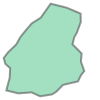

In [11]:
import geopandas as gpd
from shapely.geometry import Point, LineString
aoi = gpd.read_file("gurgaon.gpkg")['geometry'][0]
aoi

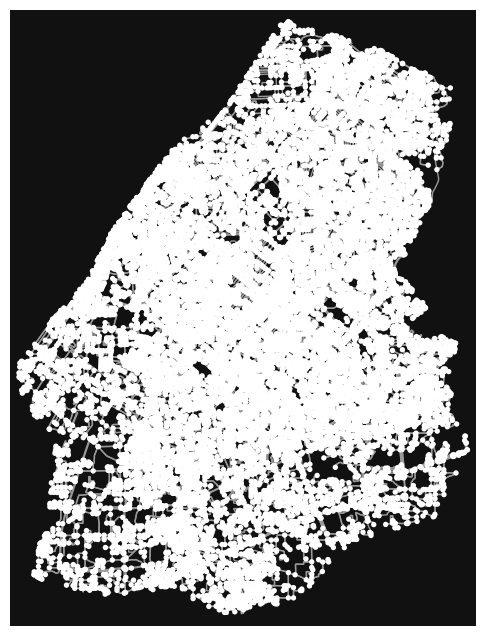

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
import osmnx as ox
G = ox.graph_from_polygon(aoi)
ox.plot_graph(G)

In [4]:
nodes, edges = ox.convert.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
edges = edges.reset_index()

In [5]:
edges

,u,v,key,osmid,name,highway,oneway,reversed,length,maxspeed,lanes,geometry,ref,access,junction,width,service,bridge,tunnel
0,245765478,2229150148,0,27061757,Civil Line Road,tertiary,False,False,9.221,NaN,NaN,"LINESTRING (77.03337 28.44677, 77.03336 28.44686)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,245765478,10989100576,0,642940954,NaN,secondary,True,False,10.491,40,NaN,"LINESTRING (77.03337 28.44677, 77.03342 28.44669)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,249120664,5228569763,0,37861632,Sector Road to Sector 56,secondary,True,False,286.270,NaN,3,"LINESTRING (77.09018 28.49046, 77.08997 28.490...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,249120664,5228569738,0,675133003,NaN,secondary_link,True,False,47.613,NaN,NaN,"LINESTRING (77.09018 28.49046, 77.09022 28.490...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,249120685,313349148,0,483037268,Mehrauli Gurgaon Road,primary,True,False,29.711,50,2,"LINESTRING (77.09540 28.48344, 77.09520 28.483...",NH148A,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58226,11873972342,9865553315,0,1279056972,NaN,primary_link,False,True,11.295,NaN,NaN,"LINESTRING (77.11083 28.48169, 77.11085 28.48179)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
58227,11873972342,3749061241,0,266780843,Mehrauli Gurgaon Road,primary,True,False,87.766,50,2,"LINESTRING (77.11083 28.48169, 77.11086 28.481...",NH148A,NaN,NaN,NaN,NaN,NaN,NaN
58228,11874003202,10989004992,0,646315257,Moulsari Road,tertiary,True,False,2.513,NaN,NaN,"LINESTRING (77.09304 28.50179, 77.09306 28.50177)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
58229,11874003218,10989255531,0,696568065,NaN,service,False,False,50.322,NaN,NaN,"LINESTRING (77.09361 28.50310, 77.09373 28.503...",NaN,private,NaN,NaN,NaN,NaN,NaN


In [6]:
import pandana as pdna

In [7]:
net= pdna.Network(nodes["x"], nodes["y"], edges["u"], edges["v"],edges[["length"]])

0       77.090988
1       77.087609
2       77.102391
3       77.047867
4       77.037370
          ...    
1925    77.090579
1926    77.035850
1927    77.073082
1928    77.036604
1929    77.088944
Name: geometry, Length: 1930, dtype: float64

In [15]:
POIs = ox.features.features_from_polygon(aoi, tags={'amenity':True, 'leisure':True, 'office':True, 'shop':True, 'healthcare':True}).reset_index()
POIs = POIs[POIs['geometry'].type != LineString]
POIs = POIs.to_crs('EPSG:7760')
POIs['geometry'] = POIs['geometry'].centroid
POIs = POIs.to_crs('EPSG:4326')
POIs = POIs[['osmid', 'amenity', 'name', 'geometry']]
POIs['lon'] = POIs.geometry.apply(lambda p: p.x)
POIs['lat'] = POIs.geometry.apply(lambda p: p.y)
print(f'Total points of interests found: {POIs.shape[0]}')

POIs.sample(5)

Total points of interests found: 1930


,osmid,amenity,name,geometry,lon,lat
290,2686108236,cafe,NaN,POINT (77.09374 28.49724),77.093739,28.497243
546,6994248249,hospital,Privat Hospital,POINT (77.07469 28.47980),77.074691,28.479795
569,7005432285,theatre,NaN,POINT (77.06912 28.46736),77.069125,28.467361
1147,11813552621,NaN,Cut & Style,POINT (77.06812 28.42515),77.068121,28.425152
1456,349817854,marketplace,B-block,POINT (77.05715 28.42511),77.057152,28.425106


## Third step: compute distances

- Pandana is built for speed.
- First, we’ll pass it a maximum search distance. distance is a variable that you can set yourself. eg. include a line 'distance = 1000' (this gives a maximum search distance of 1 kilometer)
- This allows a key step that speeds up future enquiries:
- Pandana will build a condensed representation of the network (implemented in C++), allowing rapid calculations within a defined radius of each node.
- We’ll build a table of distances to the nearest 5 points of interest from a couple of intersections
- This done, accessibility analyses for different selected amenities can be done in under a second. (Under the bonnet, two algorithms make this possible: contraction hierarchies and kd-trees.)

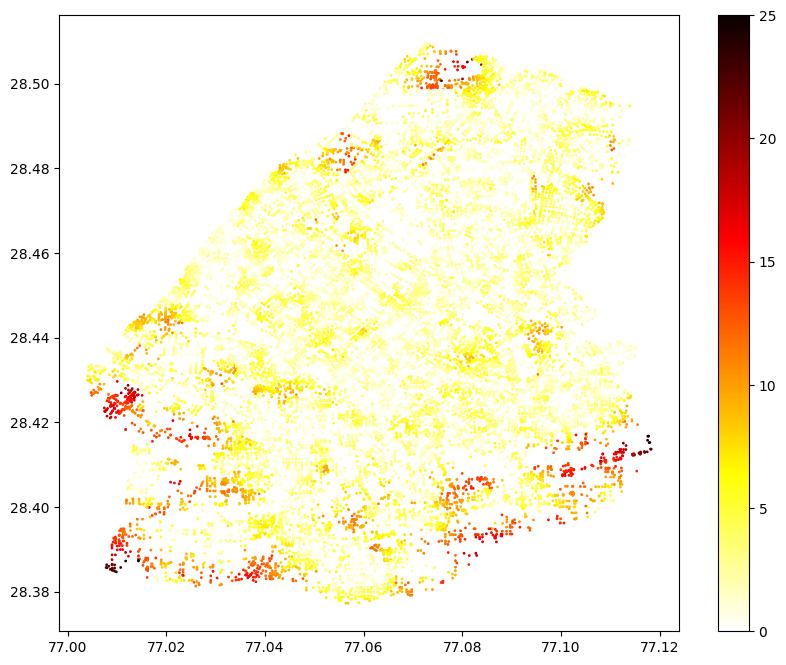

In [27]:
# initialize each amenity category with the locations (lon/lat coordinates)

distance=2500 ## in meters
num_pois = 2

amenity = 'all'
net.set_pois(category=amenity, maxdist = distance, maxitems=num_pois, x_col=POIs['lon'], y_col=POIs['lat'])
accessibility = net.nearest_pois(distance=distance, category=amenity, num_pois=num_pois)

## Convert the accessibility to minutes taken to walk to the POI
walking_speed = 100 ## m/min
accessibility = accessibility/walking_speed

def plot_nearest_amenity(accessibility,n):
    fig, ax = net.plot(accessibility[n]);
    ax.set_facecolor('k');
    ax.set_title('Pedestrian accessibility in Casablanca (Walking time to {}, in minutes (n = {}))'.format(amenity,n), fontsize=14);
    return fig

fig = plot_nearest_amenity(accessibility,1)

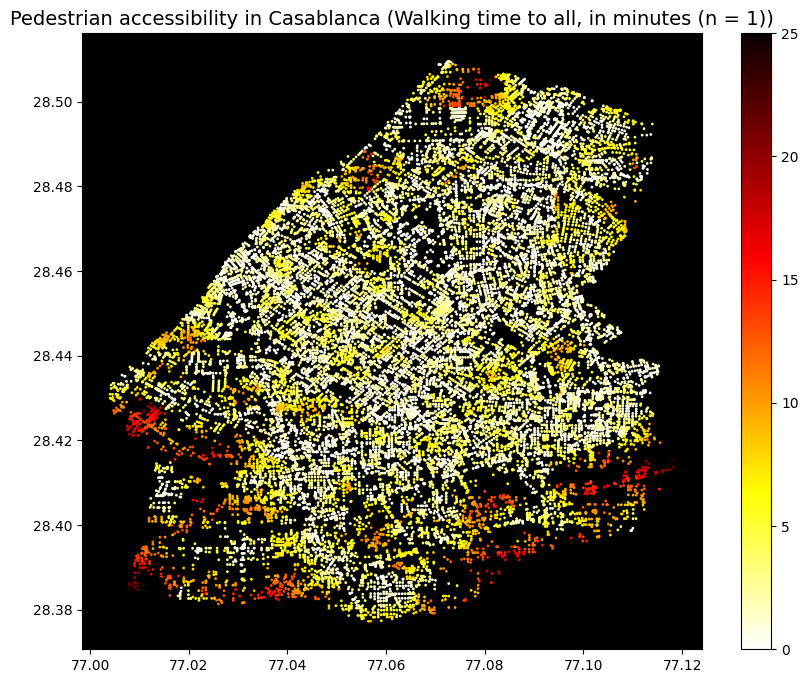

In [28]:
fig

In [31]:
POIs

,osmid,amenity,name,geometry,lon,lat
0,249054695,fuel,Indian Oil,POINT (77.09099 28.48924),77.090988,28.489238
1,249132373,hospital,"Paras Hospital, Gurgaon",POINT (77.08761 28.45093),77.087609,28.450926
2,249132375,bank,HDFC Bank,POINT (77.10239 28.44002),77.102391,28.440015
3,266374765,fuel,Bharat Petroleum,POINT (77.04787 28.43240),77.047867,28.432401
4,266374789,fuel,Indian Oil,POINT (77.03737 28.42552),77.037370,28.425517
...,...,...,...,...,...,...
1925,1279611798,NaN,NaN,POINT (77.09058 28.40272),77.090579,28.402716
1926,1951614,NaN,NaN,POINT (77.03585 28.44303),77.035850,28.443030
1927,5229329,police,Sector 29 Police Station,POINT (77.07308 28.46290),77.073082,28.462896
1928,14318967,NaN,NaN,POINT (77.03660 28.44038),77.036604,28.440376


## References

1. [Measuring pedestrian accessibility using pandana](https://towardsdatascience.com/measuring-pedestrian-accessibility-97900f9e4d56)
2. [Public Transport Accessibility in Python](https://towardsdatascience.com/public-transport-accessibility-in-python-dbdeee99f36f)